# This notebook demonstrates how to access geographical data

In [1]:
%matplotlib inline
from disaggregator import config, data, plot

### Show underlying nuts3 data

... short, in form of a dictionary:

In [2]:
dic_nuts3 = config.dict_region_code(keys='id_ags', values='natcode_nuts3')
dic_nuts3

{1051000: 'DEF05',
 1053000: 'DEF06',
 9774000: 'DE278',
 1054000: 'DEF07',
 1055000: 'DEF08',
 1056000: 'DEF09',
 1057000: 'DEF0A',
 1058000: 'DEF0B',
 1059000: 'DEF0C',
 1060000: 'DEF0D',
 1061000: 'DEF0E',
 1062000: 'DEF0F',
 2000000: 'DE600',
 3101000: 'DE911',
 3102000: 'DE912',
 3103000: 'DE913',
 3151000: 'DE914',
 3153000: 'DE916',
 3154000: 'DE917',
 3155000: 'DE918',
 3157000: 'DE91A',
 3158000: 'DE91B',
 3159000: 'DE91C',
 3241000: 'DE929',
 3251000: 'DE922',
 3252000: 'DE923',
 3254000: 'DE925',
 3255000: 'DE926',
 3256000: 'DE927',
 3257000: 'DE928',
 3351000: 'DE931',
 3352000: 'DE932',
 3353000: 'DE933',
 3354000: 'DE934',
 3355000: 'DE935',
 3356000: 'DE936',
 3357000: 'DE937',
 3358000: 'DE938',
 3359000: 'DE939',
 3360000: 'DE93A',
 3361000: 'DE93B',
 3401000: 'DE941',
 3402000: 'DE942',
 3403000: 'DE943',
 3404000: 'DE944',
 3405000: 'DE945',
 3451000: 'DE946',
 3452000: 'DE947',
 3453000: 'DE948',
 3454000: 'DE949',
 3455000: 'DE94A',
 3456000: 'DE94B',
 3457000: 'D

... long, in form of a `pd.DataFrame`:

In [3]:
df_nuts3 = config.dict_region_code(raw=True)
df_nuts3.head(n=10)

,id_t_nuts3_lk,id_nuts3,natcode_nuts3,name,id_ags_lk,ags_lk,id_ags,ags_bl,bl
idx,,,,,,,,,
0,5,27600005,DEF05,Dithmarschen,5,1051,1051000,1,Schleswig-Holstein
1,6,27600006,DEF06,Herzogtum Lauenburg,6,1053,1053000,1,Schleswig-Holstein
2,312,27600314,DE278,Günzburg,314,9774,9774000,9,Bayern
3,7,27600007,DEF07,Nordfriesland,7,1054,1054000,1,Schleswig-Holstein
4,8,27600008,DEF08,Ostholstein,8,1055,1055000,1,Schleswig-Holstein
5,9,27600009,DEF09,Pinneberg,9,1056,1056000,1,Schleswig-Holstein
6,10,27600010,DEF0A,Plön,10,1057,1057000,1,Schleswig-Holstein
7,11,27600011,DEF0B,Rendsburg-Eckernförde,11,1058,1058000,1,Schleswig-Holstein
8,12,27600012,DEF0C,Schleswig-Flensburg,12,1059,1059000,1,Schleswig-Holstein


### Show underlying geodata

The above shown data can be connected to polygon shapes which are available from the Rest-API. All that is done automatically within `data.database_shapes()`

In [4]:
gdf = data.database_shapes()
gdf.head()

,id_ags,gen,fl_km2,geometry
nuts3,,,,
DE111,8111000,Stuttgart,209.615862,"MULTIPOLYGON (((503296.317 5399263.240, 504766..."
DE112,8115000,Böblingen,616.781617,"MULTIPOLYGON (((488997.255 5376020.941, 490025..."
DE113,8116000,Esslingen,639.331297,"MULTIPOLYGON (((522281.669 5380559.673, 521383..."
DE114,8117000,Göppingen,642.076342,"MULTIPOLYGON (((553258.056 5378012.317, 551354..."
DE115,8118000,Ludwigsburg,686.186667,"MULTIPOLYGON (((529197.280 5432422.248, 527885..."


... and can easily be plotted:

<AxesSubplot:>

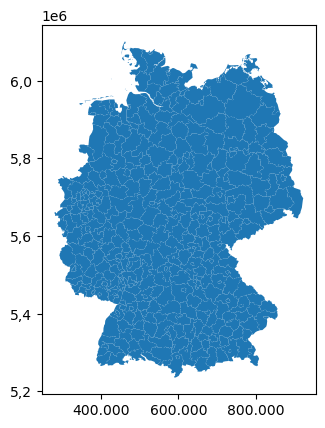

In [5]:
gdf.plot()

# Plotting with many details and annotations

In [6]:
df_pop = data.population()
df_pop.head()

nuts3
DE111    623738
DE112    381281
DE113    524127
DE114    252749
DE115    534074
Name: value, dtype: int64

Plot this dataset with a high level of detail and annotations:

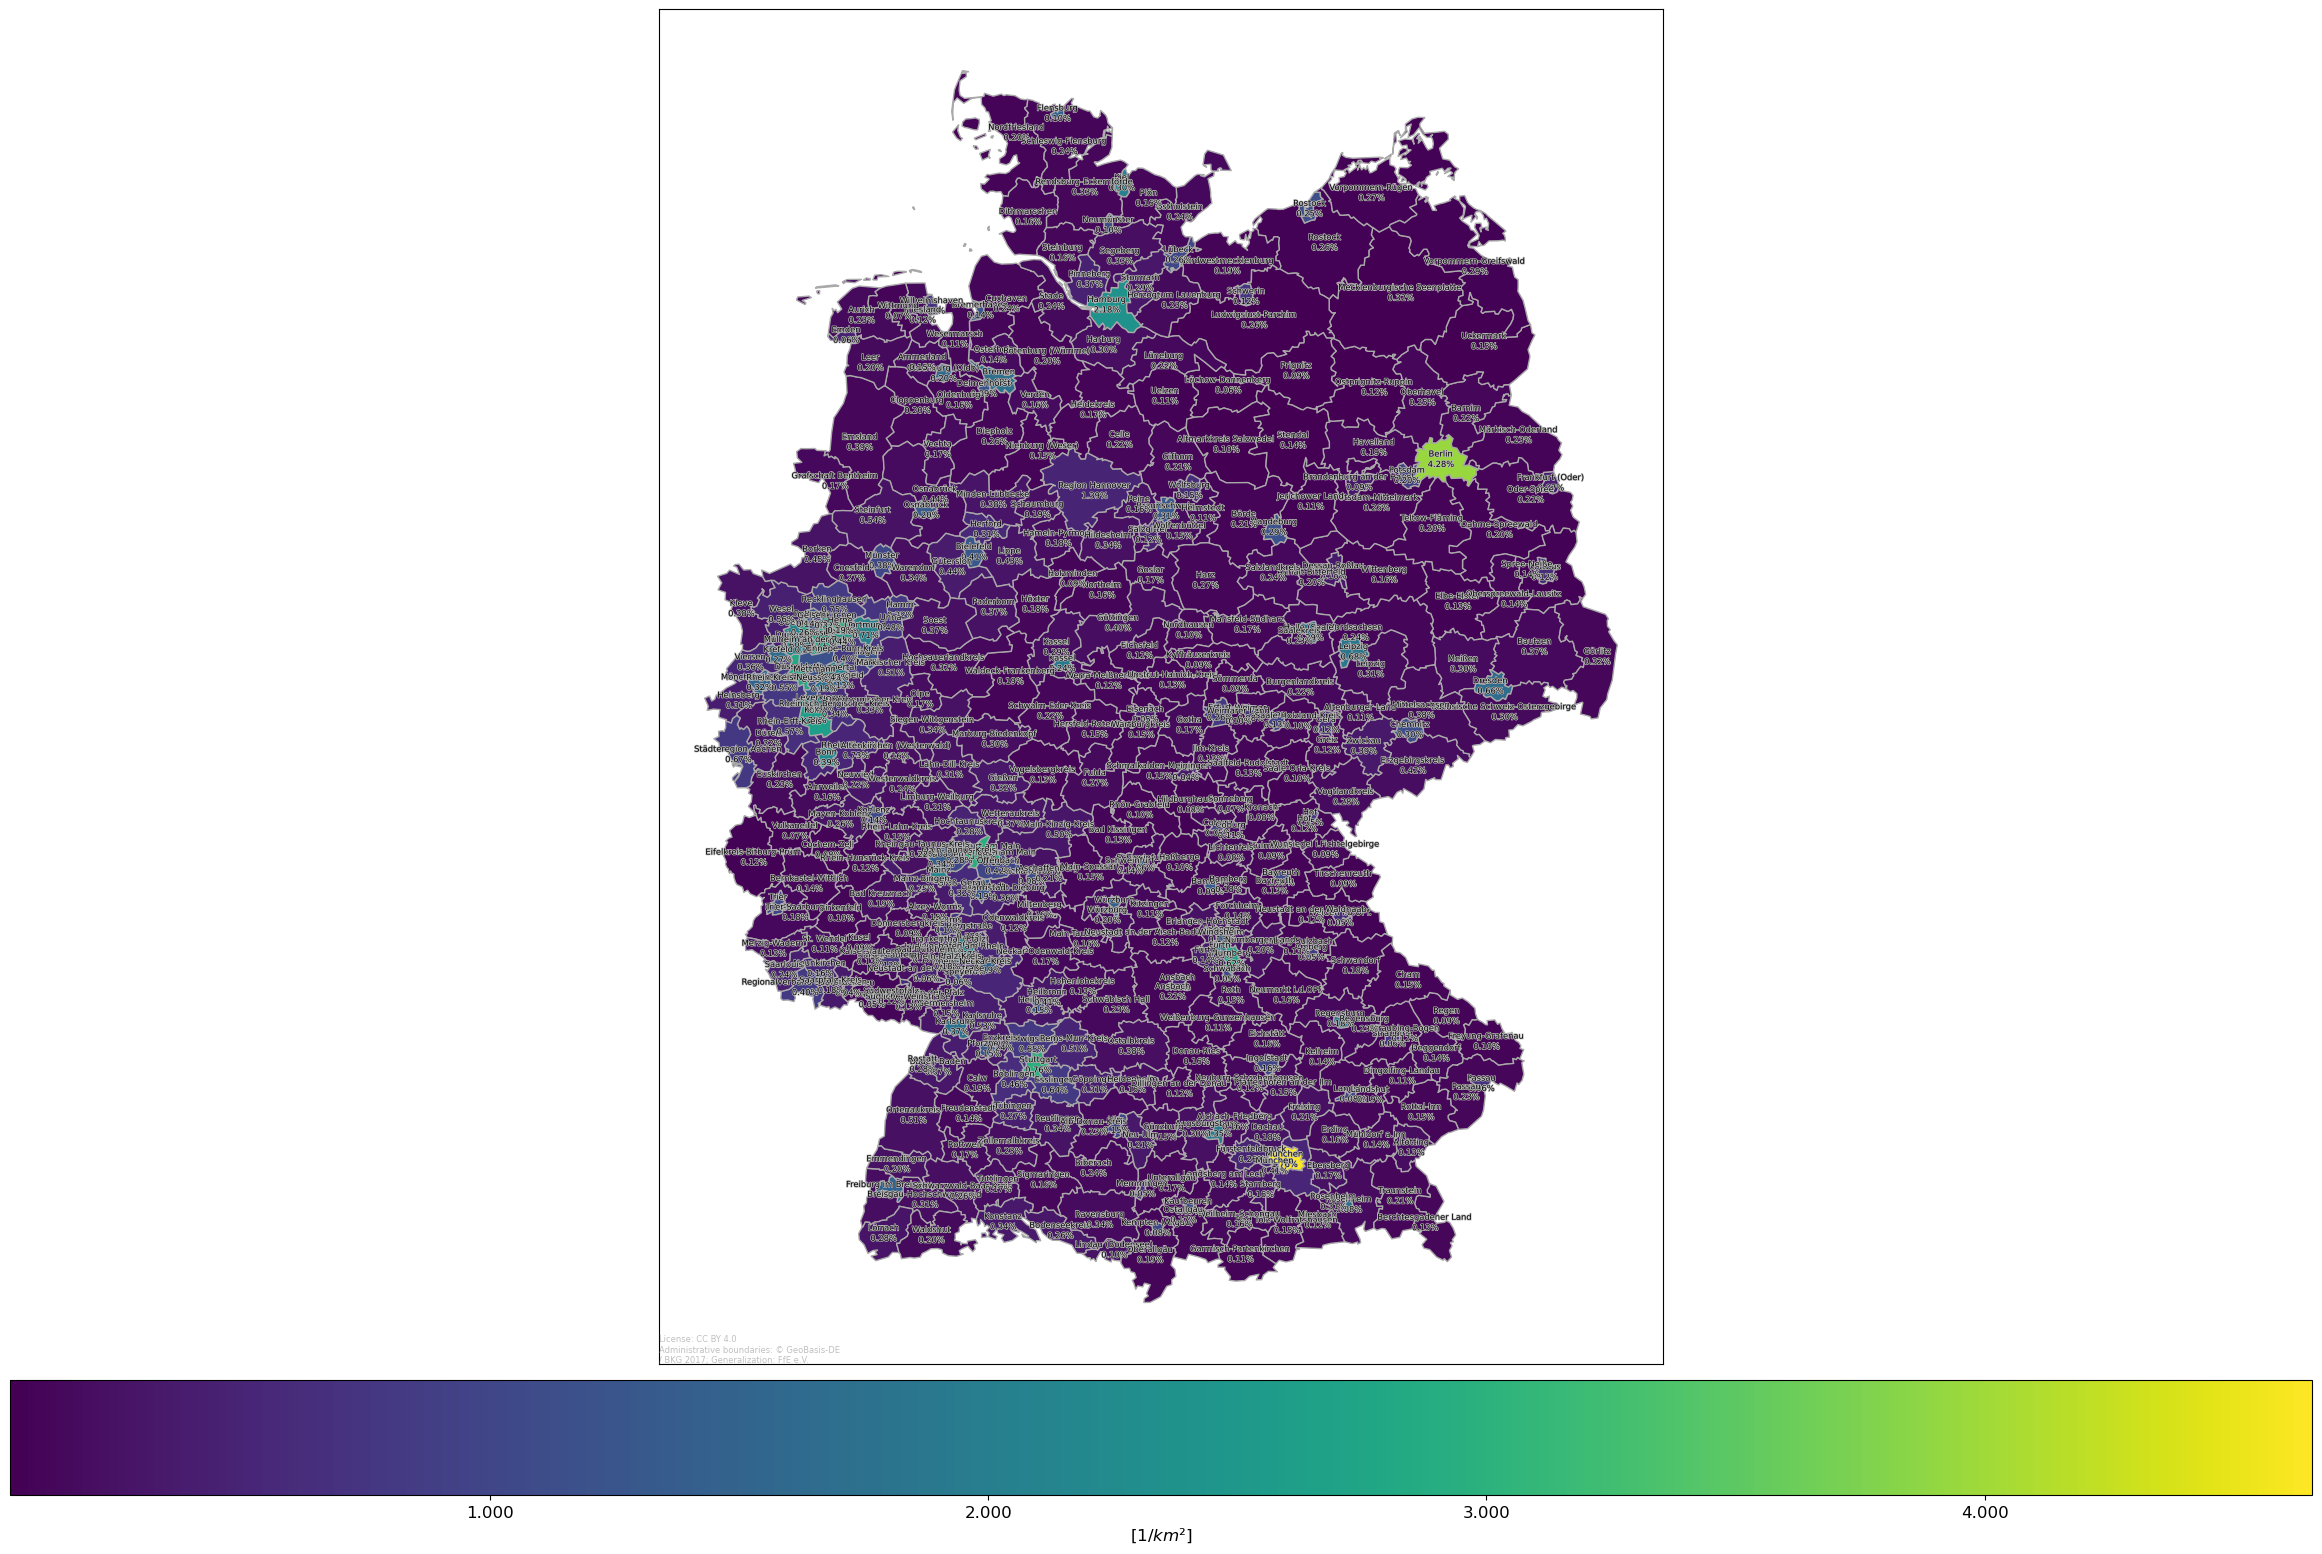

In [9]:
fig, ax = plot.choropleth_map(df_pop, annotate=['name', 'percentage'])

... and save it as a zoomable PDF file:

In [10]:
fig.savefig(config.data_out('Population_Germany_high_detail.pdf'), bbox_inches='tight')

Which looks zoomed like this:

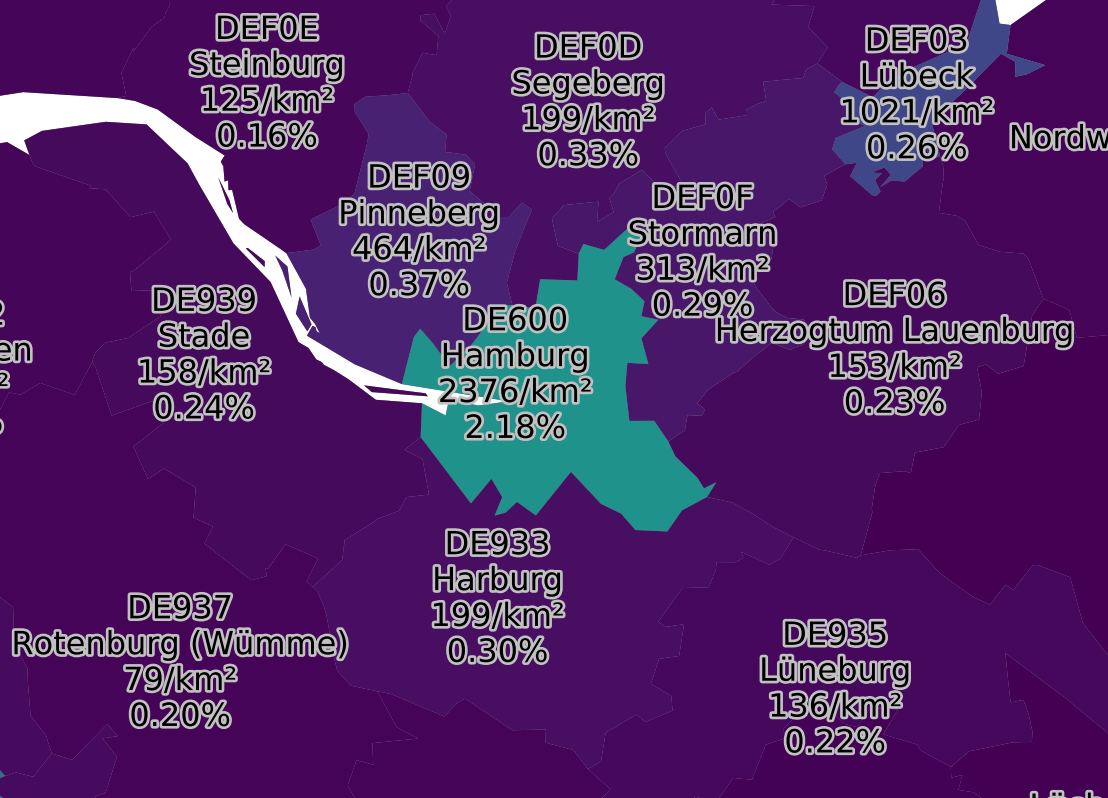

In [11]:
from IPython.display import Image
pic = Image(filename=('./img/cutting_high_details.png'))
pic